 Fs = 1000 Hz
 Ts = 0.001 s


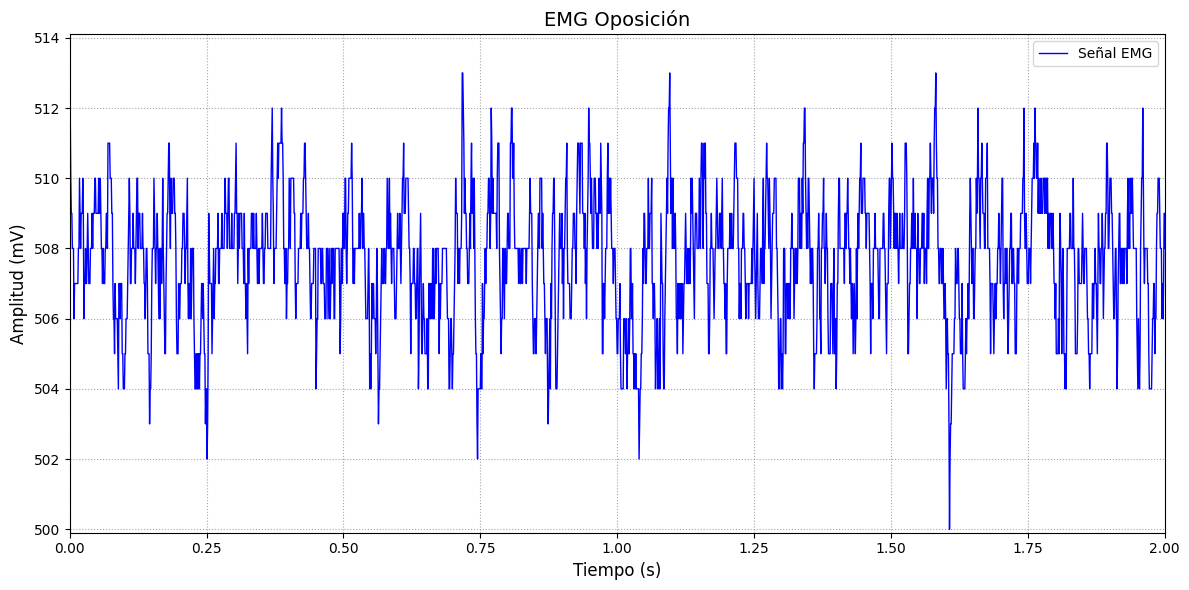

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.signal import find_peaks
from scipy.signal import butter, filtfilt

# Ruta del archivo
ruta = "../../Documentacion/Laboratorios/Lab3_EMG/brazo_oposicion.txt"

# Lectura del archivo excluyendo las 2 primeras filas
array = np.genfromtxt(ruta, skip_header=2)

# Asegurarse de que la columna indexada es la correcta (columna 6)
canalA2 = array[:, 6]  # Todas las filas de la columna 6 -> Canal A2 ECG

# Parámetros de muestreo
Fs = 1000
Ts = 1/Fs
print(f" Fs = {Fs} Hz\n Ts = {Ts} s")

# Para conocer el número de filas
M = canalA2.shape[0]  # shape devuelve una tupla con dimensiones del array
n = np.arange(0, M)
t = n * Ts  # Vector de tiempo

# Ploteamos la lectura
plt.figure(figsize=(12, 6), dpi=100)  # Tamaño de la figura y resolución
plt.plot(t, canalA2, label="Señal EMG", color='b', linewidth=1.0)  # Color y grosor de la línea
plt.grid(linestyle=":", which='both', color='gray', alpha=0.7)  # Mejorar la cuadrícula
plt.title("EMG Oposición", fontsize=14)  # Tamaño de la fuente del título
plt.xlabel("Tiempo (s)", fontsize=12)  # Tamaño de la fuente de la etiqueta del eje x
plt.ylabel("Amplitud (mV)", fontsize=12)  # Tamaño de la fuente de la etiqueta del eje y
plt.xlim([0, 2])  # Límite del eje x
plt.ylim([min(canalA2) - 0.1, max(canalA2) + 0.1])  # Límite del eje y ajustado
plt.legend(loc="upper right", fontsize=10)  # Tamaño de la fuente de la leyenda
plt.xticks(fontsize=10)  # Tamaño de la fuente de los ticks del eje x
plt.yticks(fontsize=10)  # Tamaño de la fuente de los ticks del eje y
plt.tight_layout()  # Ajustar el diseño para que no se corten las etiquetas
plt.show()

In [4]:
# Función para aplicar el filtro pasa banda
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

# Ruta del archivo
ruta = "../../Documentacion/Laboratorios/Lab3_EMG/brazo_oposicion.txt"

# Lectura del archivo excluyendo las 2 primeras filas
array = np.genfromtxt(ruta, skip_header=2)

# Asegurarse de que la columna indexada es la correcta (columna 6)
canalA2 = array[:, 6]  # Todas las filas de la columna 6 -> Canal A2 ECG

# Parámetros de muestreo
Fs = 1000
Ts = 1 / Fs
print(f" Fs = {Fs} Hz\n Ts = {Ts} s")

# Para conocer el número de filas
M = canalA2.shape[0]  # shape devuelve una tupla con dimensiones del array
n = np.arange(0, M)
t = n * Ts  # Vector de tiempo

# Parámetros del filtro
lowcut = 5.0  # Frecuencia mínima
highcut = 160.0  # Frecuencia máxima

# Aplicar el filtro pasa banda
filtered_signal = bandpass_filter(canalA2, lowcut, highcut, Fs)

# Aplicar la transformada wavelet
wavelet = 'db3'
level = 8
coeffs = pywt.wavedec(filtered_signal, wavelet, level=level)

# Filtrar los coeficientes
threshold = 0.2
filtered_coeffs = [pywt.threshold(coeff, threshold, mode='soft') for coeff in coeffs]

# Reconstruir la señal filtrada
filtered_signal = pywt.waverec(filtered_coeffs, wavelet)

 Fs = 1000 Hz
 Ts = 0.001 s


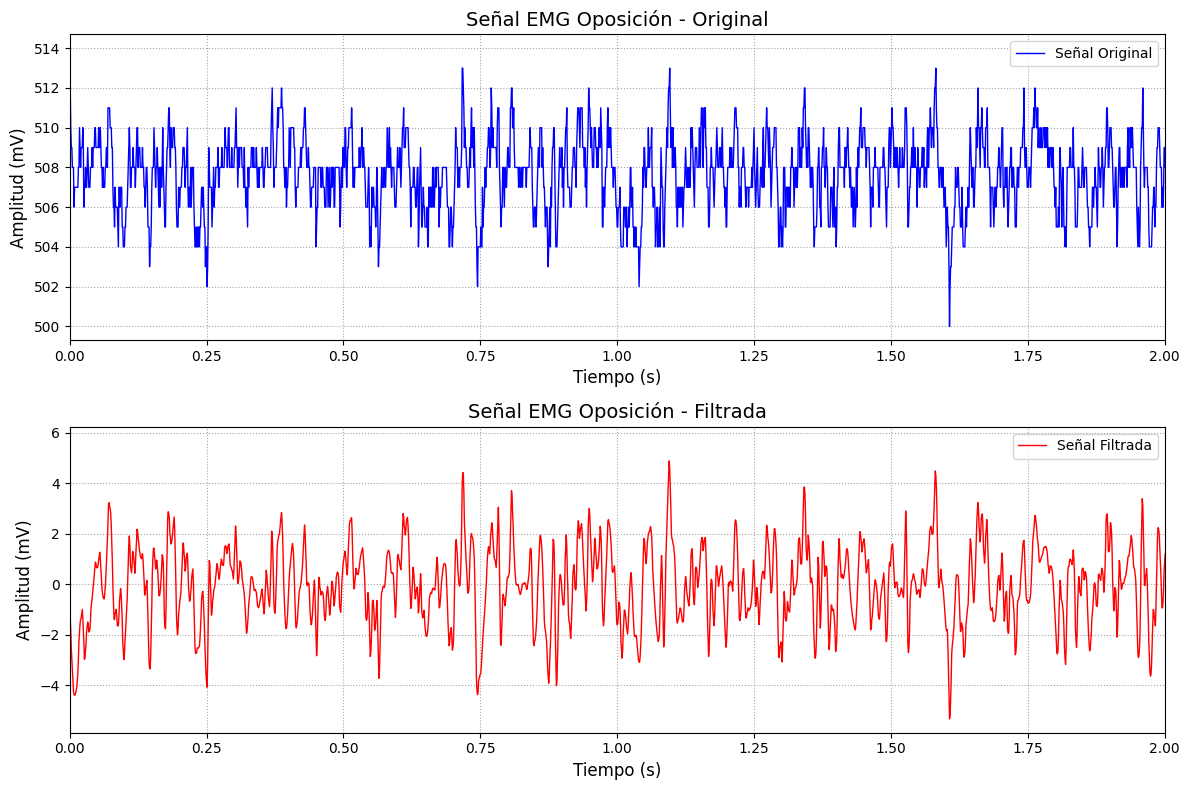

In [5]:
# Ploteamos la señal original y la señal filtrada
plt.figure(figsize=(12, 8), dpi=100)

# Señal original
plt.subplot(2, 1, 1)
plt.plot(t, canalA2, label="Señal Original", color='b', linewidth=1.0)
plt.grid(linestyle=":", which='both', color='gray', alpha=0.7)
plt.title("Señal EMG Oposición - Original", fontsize=14)
plt.xlabel("Tiempo (s)", fontsize=12)
plt.ylabel("Amplitud (mV)", fontsize=12)
plt.xlim([0, 2])
plt.legend(loc="upper right", fontsize=10)

# Señal filtrada
plt.subplot(2, 1, 2)
plt.plot(t[:len(filtered_signal)], filtered_signal, label="Señal Filtrada", color='r', linewidth=1.0)
plt.grid(linestyle=":", which='both', color='gray', alpha=0.7)
plt.title("Señal EMG Oposición - Filtrada", fontsize=14)
plt.xlabel("Tiempo (s)", fontsize=12)
plt.ylabel("Amplitud (mV)", fontsize=12)
plt.xlim([0, 2])
plt.legend(loc="upper right", fontsize=10)

plt.tight_layout()
plt.show()

